In [297]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

df_base = pd.read_csv('data/food-facts/data.featureEngineering.tsv', sep='\t', dtype={'code':str})
print(df_base.shape)
df_base.head()

(157893, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
0,4559,Peanuts,Torn & Glasser,17.86,0.63500,0
1,16087,Organic Salted Nut Mix,Grizzlies,3.57,1.22428,1
2,16124,Organic Muesli,Daddy's Muesli,15.62,0.13970,1
3,16872,Zen Party Mix,Sunridge,3.33,1.60782,0
4,18012,Cinnamon Nut Granola,Grizzlies,21.82,0.02286,0


In [298]:
# ratio salt and sugar levels for whole data
grp_organic = df_base.groupby('organic')
df_grp_organic = pd.DataFrame({'organic_count' : grp_organic.size()})
df_grp_organic['organic_portion'] = df_grp_organic['organic_count'] / df_base.shape[0]
df_grp_organic['total_sugar'] = df_base.pivot_table('sugars_100g', columns='organic', aggfunc=sum).T
df_grp_organic['total_sugar_portion'] = df_grp_organic['total_sugar'] / df_grp_organic['total_sugar'].sum()
df_grp_organic['total_salt'] = df_base.pivot_table('salt_100g', columns='organic', aggfunc=sum).T
df_grp_organic['total_salt_portion'] = df_grp_organic['total_salt'] / df_grp_organic['total_salt'].sum()
df_grp_organic.index = ['Non-organic','organic']
print(df_grp_organic.shape)
df_grp_organic.head()

(2, 6)


,organic_count,organic_portion,total_sugar,total_sugar_portion,total_salt,total_salt_portion
Non-organic,149634,0.947692,2557243.366,0.959504,198552.657242,0.9761
organic,8259,0.052308,107928.117,0.040496,4861.658555,0.0239


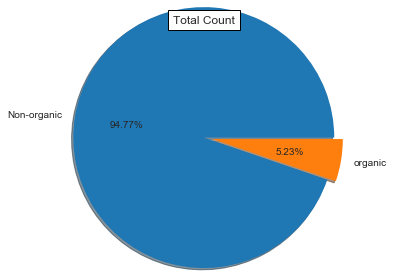

In [299]:
#xpos = np.arange(len(df_grp_organic.index))
#plt.bar(df_grp_organic.index, df_grp_organic.organic_count, label="Product Count")
plt.title("Total Count", bbox={'facecolor':'2', 'pad':5})
plt.axis("equal")

plt.pie(df_grp_organic.organic_count, labels=df_grp_organic.index, shadow=True, autopct='%1.2f%%',radius=1.5,explode=[0,0.1])
plt.show()

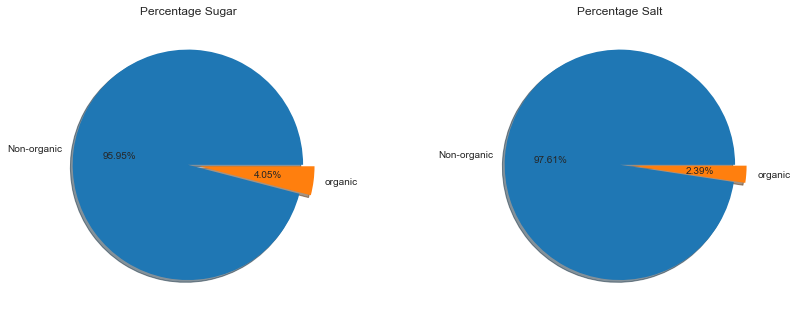

In [300]:
fig = plt.figure()

ax_sugar = fig.add_axes([0,0,1,1], aspect=1)
ax_sugar.pie(df_grp_organic.total_sugar_portion, labels=df_grp_organic.index, \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_sugar.set_title('Percentage Sugar')


ax_salt = fig.add_axes([1,0,1,1], aspect=1)
ax_salt.pie(df_grp_organic.total_salt_portion, labels=df_grp_organic.index, \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_salt.set_title('Percentage Salt')
plt.show()

In [301]:
print(df_base.shape)
df_base.head()

(157893, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
0,4559,Peanuts,Torn & Glasser,17.86,0.63500,0
1,16087,Organic Salted Nut Mix,Grizzlies,3.57,1.22428,1
2,16124,Organic Muesli,Daddy's Muesli,15.62,0.13970,1
3,16872,Zen Party Mix,Sunridge,3.33,1.60782,0
4,18012,Cinnamon Nut Granola,Grizzlies,21.82,0.02286,0


In [302]:
# top 100 counts for brands
mask_brand = df_base['brands'].value_counts()[0:100].index
mask_brand

Index(['Meijer', 'Kroger', 'Great Value', 'Spartan', 'Ahold', 'Roundy's',
       'Weis', 'Food Lion', 'Shoprite', 'Harris Teeter', 'Giant Eagle',
       'Hy Vee', 'Food Club', 'Hannaford', 'Whole Foods Market',
       'Target Stores', '365 Everyday Value', 'Wegmans', 'Essential Everyday',
       'Market Pantry', 'Schnucks', 'Weis Quality', 'Goya', 'Giant', 'Tops',
       'Trader Joe's', 'Fresh & Easy', 'Big Y', 'Winn Dixie', 'Brookshire's',
       'Clover Valley', 'Wal Mart Stores', 'Key Food', 'Raley's', 'Nice',
       'Western Family', 'Valu Time', 'Signature Kitchens', 'Gold Emblem',
       'Southern Home', 'Shurfine', 'Wilton', 'Dannon', 'Hormel',
       'Lowes Foods', 'Archer Farms', 'Wild Harvest', 'Private Selection',
       'Safeway', 'Galerie', 'Simply Balanced', 'Winco Foods', 'H E B',
       'Welch's', 'Full Circle', 'Del Monte', 'Russell Stover',
       'Bob's Red Mill', 'Family Gourmet', 'Amy's', 'Blue Bunny', 'The Bakery',
       'Dole', 'The Hain Celestial Group', 'Weis 

In [303]:
df_100brands = df_base[(df_base['brands'].isin(mask_brand))]
print(df_100brands.shape)
df_100brands.head()

(45876, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
35,33060,10-Grain Pancake Mix,Bob's Red Mill,5.17,2.75844,0
38,34425,"Foods, Spanish Peanuts",Kettle,3.57,1.13284,0
39,34432,"Foods, Honey Roasted Nut Mix",Kettle,3.57,1.08966,0
41,34456,"Foods, Deluxe Nut Mix",Kettle,3.57,0.58928,0
42,34470,"Foods, Honey Roast Nuts & Fruit Mix",Kettle,32.00,0.20320,0


In [304]:
grp_brand_sugar = df_100brands['sugars_100g'].groupby([df_100brands['brands'],df_100brands['organic']]).count()
print(grp_brand_sugar.head())
df_brand = grp_brand_sugar.unstack()
df_brand.columns = ['Non-org-cnt','Organic-cnt']
df_brand.head()

brands              organic
365 Everyday Value  0           587
                    1           272
Ahold               0          1185
                    1            86
Aldi Bennerpany     0           169
Name: sugars_100g, dtype: int64


,Non-org-cnt,Organic-cnt
brands,,
365 Everyday Value,587.0,272.0
Ahold,1185.0,86.0
Aldi Bennerpany,169.0,9.0
Amy's,192.0,49.0
Archer Farms,297.0,3.0


In [305]:
# Change type to int
df_brand['Non-org-cnt'] = df_brand['Non-org-cnt'].astype(int)
df_brand['Organic-cnt'] = df_brand['Organic-cnt'].fillna(0).astype(int)

# sort by Organic count
df_brand.sort_values("Organic-cnt", inplace=True, ascending=False )
print(df_brand.shape)
df_brand.head()

(100, 2)


,Non-org-cnt,Organic-cnt
brands,,
365 Everyday Value,587,272
Wild Harvest,108,186
O Organics,46,149
Meijer,2504,146
Simply Balanced,127,143


In [306]:
# add percetage to df_brand
df_brand['Non-org-pcnt'] = df_brand['Non-org-cnt'] / df_brand.sum(axis=1)
df_brand['Organic-pcnt'] = df_brand['Organic-cnt'] / df_brand.sum(axis=1)
print(df_brand.shape)
df_brand.head()

(100, 4)


,Non-org-cnt,Organic-cnt,Non-org-pcnt,Organic-pcnt
brands,,,,
365 Everyday Value,587,272,0.683353,0.316396
Wild Harvest,108,186,0.367347,0.631864
O Organics,46,149,0.235897,0.763179
Meijer,2504,146,0.944906,0.055075
Simply Balanced,127,143,0.470370,0.528709


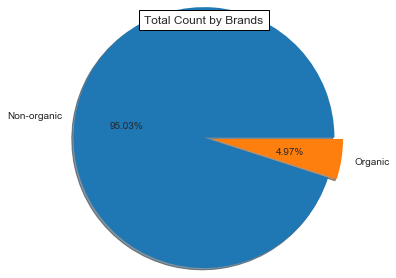

In [307]:
plt.title("Total Count by Brands", bbox={'facecolor':'2', 'pad':5})
plt.axis("equal")

plt.pie(df_brand[['Non-org-cnt', 'Organic-cnt']].sum(), labels=['Non-organic','Organic'],\
        shadow=True, autopct='%1.2f%%',radius=1.5,explode=[0,0.1])
plt.show()

In [308]:
df_brand_both = df_brand[(df_brand['Non-org-cnt'] != 0) & (df_brand['Organic-cnt'] != 0)]
print(df_brand_both.shape)
df_brand_both.head()

(54, 4)


,Non-org-cnt,Organic-cnt,Non-org-pcnt,Organic-pcnt
brands,,,,
365 Everyday Value,587,272,0.683353,0.316396
Wild Harvest,108,186,0.367347,0.631864
O Organics,46,149,0.235897,0.763179
Meijer,2504,146,0.944906,0.055075
Simply Balanced,127,143,0.470370,0.528709


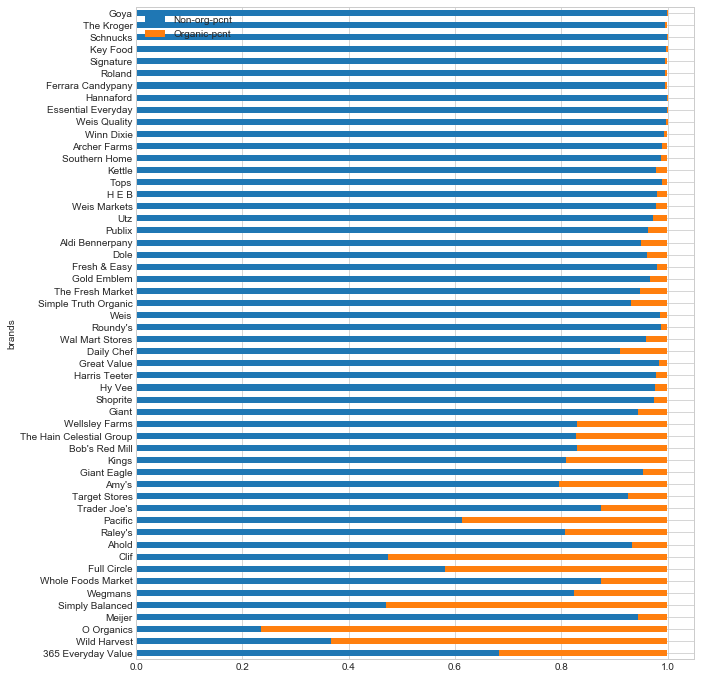

In [309]:
ax_brand_org = df_brand_both[['Non-org-pcnt','Organic-pcnt']]\
    .plot(kind="barh", alpha=1, label="Brands", figsize=(10,12), stacked=True)

In [310]:
df_brand_both.sort_values("Organic-cnt", inplace=True, ascending=False )
print(df_brand_both.shape)
df_brand_both.head()

(54, 4)


C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Non-org-cnt,Organic-cnt,Non-org-pcnt,Organic-pcnt
brands,,,,
365 Everyday Value,587,272,0.683353,0.316396
Wild Harvest,108,186,0.367347,0.631864
O Organics,46,149,0.235897,0.763179
Meijer,2504,146,0.944906,0.055075
Simply Balanced,127,143,0.470370,0.528709


In [311]:
# Sugar
df_bands_sugar = df_base[(df_base['brands'].isin(df_brand_both.index))].pivot_table(\
    'sugars_100g', index="organic", columns='brands', aggfunc=sum).T
df_bands_sugar.columns = ['Non-org-sugar','Organic-sugar']
df_bands_sugar['Organic-sugar'] = df_bands_sugar['Organic-sugar'].fillna(0.0)

df_bands_sugar['N-sugar-pcnt'] = df_bands_sugar['Non-org-sugar'] / df_bands_sugar.sum(axis=1)
df_bands_sugar['O-sugar-pcnt'] = df_bands_sugar['Organic-sugar'] / df_bands_sugar.sum(axis=1)

print(df_bands_sugar.shape)
df_bands_sugar.head()

(54, 4)


,Non-org-sugar,Organic-sugar,N-sugar-pcnt,O-sugar-pcnt
brands,,,,
365 Everyday Value,5851.36,2980.07,0.662561,0.337414
Ahold,18134.62,765.59,0.959493,0.040505
Aldi Bennerpany,3648.03,38.29,0.989613,0.010384
Amy's,752.57,398.18,0.653982,0.345821
Archer Farms,4852.67,6.94,0.998572,0.001428


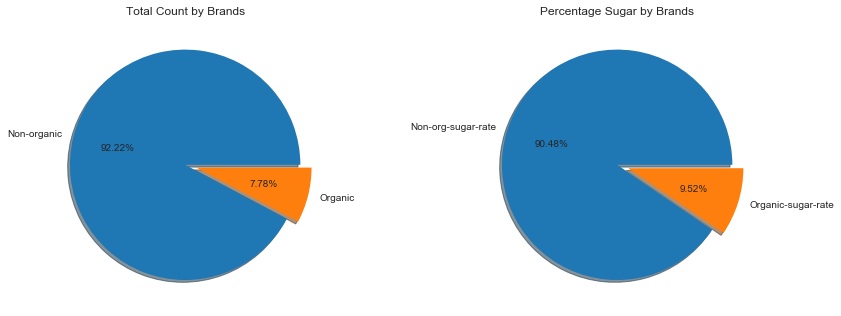

In [312]:
fig = plt.figure()
ax_brand_sugar_cnt = fig.add_axes([0,0,1,1], aspect=1)
ax_brand_sugar_cnt.pie(df_brand_both[['Non-org-cnt', 'Organic-cnt']].sum(), \
    labels=['Non-organic','Organic'], shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_sugar_cnt.set_title('Total Count by Brands')


ax_brand_sugar_pcnt = fig.add_axes([1,0,1,1], aspect=1)
ax_brand_sugar_pcnt.pie(df_bands_sugar[['N-sugar-pcnt','O-sugar-pcnt']].sum(), \
    labels=['Non-org-sugar-rate', 'Organic-sugar-rate'], shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_sugar_pcnt.set_title('Percentage Sugar by Brands')
plt.show()

In [313]:
# Salt
df_bands_salt = df_base[(df_base['brands'].isin(df_brand_both.index))].pivot_table(\
    'salt_100g', index="organic", columns='brands', aggfunc=sum).T
df_bands_salt.columns = ['Non-org-salt','Organic-salt']
df_bands_salt['Organic-salt'] = df_bands_salt['Organic-salt'].fillna(0.0)
df_bands_salt['N-salt-pcnt'] = df_bands_salt['Non-org-salt'] / df_bands_salt.sum(axis=1)
df_bands_salt['O-salt-pcnt'] = df_bands_salt['Organic-salt'] / df_bands_salt.sum(axis=1)
print(df_bands_salt.shape)
df_bands_salt.head()

(54, 4)


,Non-org-salt,Organic-salt,N-salt-pcnt,O-salt-pcnt
brands,,,,
365 Everyday Value,541.73628,202.00874,0.728390,0.271344
Ahold,1272.73304,37.66820,0.971254,0.028724
Aldi Bennerpany,199.71766,8.30072,0.960096,0.039720
Amy's,155.46906,32.82188,0.825685,0.173554
Archer Farms,342.11006,1.92786,0.994396,0.005587


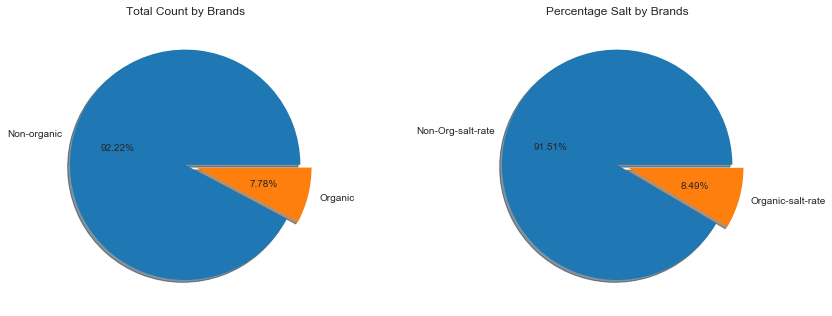

In [314]:
fig = plt.figure()
ax_brand_salt_cnt = fig.add_axes([0,0,1,1], aspect=1)
ax_brand_salt_cnt.pie(df_brand_both[['Non-org-cnt', 'Organic-cnt']].sum(), labels=['Non-organic','Organic'], \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_salt_cnt.set_title('Total Count by Brands')


ax_brand_salt_pcnt = fig.add_axes([1,0,1,1], aspect=1)
ax_brand_salt_pcnt.pie(df_bands_salt[['N-salt-pcnt','O-salt-pcnt']].sum(), labels=['Non-Org-salt-rate', 'Organic-salt-rate'], \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_salt_pcnt.set_title('Percentage Salt by Brands')
plt.show()

In [315]:
# merge 
df_brand_both_set = pd.merge(df_bands_sugar, df_bands_salt, left_index = True, right_index = True)
print(df_brand_both_set.shape)
df_brand_both_set.head()

(54, 8)


,Non-org-sugar,Organic-sugar,N-sugar-pcnt,O-sugar-pcnt,Non-org-salt,Organic-salt,N-salt-pcnt,O-salt-pcnt
brands,,,,,,,,
365 Everyday Value,5851.36,2980.07,0.662561,0.337414,541.73628,202.00874,0.728390,0.271344
Ahold,18134.62,765.59,0.959493,0.040505,1272.73304,37.66820,0.971254,0.028724
Aldi Bennerpany,3648.03,38.29,0.989613,0.010384,199.71766,8.30072,0.960096,0.039720
Amy's,752.57,398.18,0.653982,0.345821,155.46906,32.82188,0.825685,0.173554
Archer Farms,4852.67,6.94,0.998572,0.001428,342.11006,1.92786,0.994396,0.005587


# View point of Organic Foods

In [316]:
# Count for brands
print(df_base['brands'].value_counts().shape)

df_organic = df_base[df_base['organic'] == 1]
print(df_organic.shape)

(22119,)
(8259, 6)


In [317]:
mask_organic_brand = df_organic['brands'].value_counts().index
print(mask_organic_brand)
df_org_brands = df_base[(df_base['brands'].isin(mask_organic_brand))]
print(df_org_brands.shape)
df_org_brands.head()

Index(['365 Everyday Value', 'Wild Harvest', 'O Organics', 'Meijer',
       'Simply Balanced', 'Wegmans', 'Whole Foods Market', 'Full Circle',
       'Cadia', 'Clif',
       ...
       'Wan Ja Shan Int'L.', 'Dolcezza', 'Blue Marble', 'Go Gourmet',
       'Pete And Gerry's', 'Blue Marble Ventures', 'Hatch', 'Covilli',
       'Sun Brothers .', 'Road's End'],
      dtype='object', length=1664)
(53124, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
0,4559,Peanuts,Torn & Glasser,17.86,0.63500,0
1,16087,Organic Salted Nut Mix,Grizzlies,3.57,1.22428,1
2,16124,Organic Muesli,Daddy's Muesli,15.62,0.13970,1
3,16872,Zen Party Mix,Sunridge,3.33,1.60782,0
4,18012,Cinnamon Nut Granola,Grizzlies,21.82,0.02286,0


In [318]:
grp_brand_sugar = df_org_brands['sugars_100g'].groupby([df_org_brands['brands'],df_org_brands['organic']]).count()
df_org_brand = grp_brand_sugar.unstack()
df_org_brand.columns = ['Non-organic-count','Organic-count']
df_org_brand.sort_values("Organic-count", ascending=False, inplace=True)
# organic brands counts
print(len(df_org_brand.index))
# tatal organic
print(df_org_brand['Organic-count'].sum())
df_org_brand.head()

1664
8259.0


,Non-organic-count,Organic-count
brands,,
365 Everyday Value,587.0,272.0
Wild Harvest,108.0,186.0
O Organics,46.0,149.0
Meijer,2504.0,146.0
Simply Balanced,127.0,143.0


In [319]:
# sampling for a brand
df_365 = df_base[df_base['brands'] == '365 Everyday Value']
df_365.to_csv('data/food-facts/df_365.tsv', sep='\t',  encoding='utf-8')
print(df_365.shape)
df_365.head()

(859, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
97127,0099482160227,"Organic Microwave Popcorn, Butter",365 Everyday Value,3.03,2.30886,1
97128,0099482160319,Organic Mozzarella String Cheese,365 Everyday Value,0.00,1.90500,1
97130,0099482161521,Organic Mixed Berry Conserve,365 Everyday Value,52.63,0.00000,1
97131,0099482400040,"Linguine Pasta, Premium Italian Enriched Macar...",365 Everyday Value,3.57,0.00000,0
97132,0099482401153,Whole Peeled Tomatoes,365 Everyday Value,2.48,0.37846,0


In [320]:
# Functions for sugar levels by brands
def df_extract_sugar(df, word):
    df_ext = df[df['product_name'].str.contains(r''+word+'',flags=re.IGNORECASE)]
    grp_ext_sugar = df_ext['sugars_100g'].groupby([df_ext['brands'],df_ext['organic']]).count()
    df_ext_sugar = grp_ext_sugar.unstack()    
    df_ext_sugar.columns = ['Non-org-cnt','Organic-cnt']
    df_ext_sugar['Non-org-cnt'] = df_ext_sugar['Non-org-cnt'].fillna(0).astype(int)
    df_ext_sugar['Non-org-cnt'] = df_ext_sugar['Non-org-cnt'].astype(int)
    df_ext_sugar['Organic-cnt'] = df_ext_sugar['Organic-cnt'].fillna(0).astype(int)
    df_ext_sugar.sort_values("Organic-cnt", inplace=True, ascending=False )
    
    # remove 0 count both
    df_ext_sugar = df_ext_sugar[(df_ext_sugar['Non-org-cnt'] != 0) \
        & (df_ext_sugar['Organic-cnt'] != 0)]


    grp_ext_sugar_sum = df_ext['sugars_100g'].groupby([df_ext['brands'],df_ext['organic']]).sum()
    df_ext_sugar_sum = grp_ext_sugar_sum.unstack()
    df_ext_sugar_sum.columns = ['Non-org-sum','Organic-sum']
    df_ext_sugar_sum['Non-org-sum'] = df_ext_sugar_sum['Non-org-sum'].fillna(0.0)
    df_ext_sugar_sum['Organic-sum'] = df_ext_sugar_sum['Organic-sum'].fillna(0.0)
    df_ext_sugar_sum.sort_values("Organic-sum", inplace=True, ascending=False )
    
    # remove 0 count both
    df_ext_sugar_sum = df_ext_sugar_sum[(df_ext_sugar_sum['Non-org-sum'] != 0.0) \
        & (df_ext_sugar_sum['Organic-sum'] != 0.0)]
    
    df_ext_set = pd.merge(df_ext_sugar, df_ext_sugar_sum, left_index = True, right_index = True)
    df_ext_set['Non-org-result'] = df_ext_set['Non-org-sum'] / df_ext_set['Non-org-cnt']
    df_ext_set['Organic-result'] = df_ext_set['Organic-sum'] / df_ext_set['Organic-cnt']
    df_ext_set.sort_index(inplace=True)
    return df_ext_set

In [321]:
# Functions for sugar & salt levels by brands
# call like this "df_salsa = df_extract(df_base,'salsa',0)
def df_extract(df, word, fg):
    df_ext_temp = df[df['product_name'].str.contains(r''+word+'',flags=re.IGNORECASE)]
    if fg is 0:
        grp_ext_cnt = df_ext_temp['sugars_100g'].groupby([df_ext_temp['brands'],df_ext_temp['organic']]).count()
        print('sugars_100g')
    elif fg is 1:    
        grp_ext_cnt = df_ext_temp['salt_100g'].groupby([df_ext_temp['brands'],df_ext_temp['organic']]).count()
        print('salt_100g')
        
    df_ext_cnt = grp_ext_cnt.unstack()    
    df_ext_cnt.columns = ['Non-org-cnt','Organic-cnt']
    df_ext_cnt['Non-org-cnt'] = df_ext_cnt['Non-org-cnt'].fillna(0).astype(int)
    df_ext_cnt['Non-org-cnt'] = df_ext_cnt['Non-org-cnt'].astype(int)
    df_ext_cnt['Organic-cnt'] = df_ext_cnt['Organic-cnt'].fillna(0).astype(int)
    df_ext_cnt.sort_values("Organic-cnt", inplace=True, ascending=False )

    # remove 0 count both
    df_ext_cnt = df_ext_cnt[(df_ext_cnt['Non-org-cnt'] != 0) & (df_ext_cnt['Organic-cnt'] != 0)]
    
    if fg is 0:
        grp_ext_sum = df_ext_temp['sugars_100g'].groupby([df_ext_temp['brands'],df_ext_temp['organic']]).sum()
    elif fg is 1:    
        grp_ext_sum = df_ext_temp['salt_100g'].groupby([df_ext_temp['brands'],df_ext_temp['organic']]).sum()
    

    df_ext_sum = grp_ext_sum.unstack()
    df_ext_sum.columns = ['Non-org-sum','Organic-sum']
    df_ext_sum['Non-org-sum'] = df_ext_sum['Non-org-sum'].fillna(0.0)
    df_ext_sum['Organic-sum'] = df_ext_sum['Organic-sum'].fillna(0.0)
    df_ext_sum.sort_values("Organic-sum", inplace=True, ascending=False )
    
    # remove 0 count both
    df_ext_sum = df_ext_sum[(df_ext_sum['Non-org-sum'] != 0.0) & (df_ext_sum['Organic-sum'] != 0.0)]
    
    df_ext_set = pd.merge(df_ext_cnt, df_ext_sum, left_index = True, right_index = True)
    df_ext_set['Non-org-result'] = df_ext_set['Non-org-sum'] / df_ext_set['Non-org-cnt']
    df_ext_set['Organic-result'] = df_ext_set['Organic-sum'] / df_ext_set['Organic-cnt']
    df_ext_set.sort_index(inplace=True)
    return df_ext_set

In [322]:
# 0 = sugar , 1 = salt
df_salsa_sugar = df_extract(df_base,'salsa', 0)
print(df_salsa_sugar.shape)
df_salsa_salt = df_extract(df_base,'salsa', 1)
print(df_salsa_salt.shape)

sugars_100g
(16, 6)
salt_100g
(18, 6)


In [323]:
df_salsa = df_extract_sugar(df_base,'salsa')
print(df_salsa.shape)
df_salsa

(16, 6)


,Non-org-cnt,Organic-cnt,Non-org-sum,Organic-sum,Non-org-result,Organic-result
brands,,,,,,
365 Everyday Value,17,2,85.44,6.66,5.025882,3.330
Ahold,7,3,34.95,9.99,4.992857,3.330
Blue Smoke,6,1,80.63,12.90,13.438333,12.900
Full Circle,5,2,13.33,6.66,2.666000,3.330
Hy Vee,7,4,20.83,16.66,2.975714,4.165
Italian Rose,1,1,3.33,3.33,3.330000,3.330
La Preferida,5,3,23.65,9.69,4.730000,3.230
La Victoria,22,1,98.79,3.23,4.490455,3.230
Pulmuone Foods Usa,2,1,6.66,3.33,3.330000,3.330


In [324]:
# checking a Brand for Hy Vee
df_HyVee = df_base[(df_base['brands'] == 'Hy Vee') & (df_base['product_name'].str.contains(r'salsa',flags=re.IGNORECASE))]
print(df_HyVee.shape)
df_HyVee

(11, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
78340,75450017236,Salsa Con Queso,Hy Vee,2.94,2.09296,0
78341,75450017250,Monterey Jack Salsa Con Queso,Hy Vee,3.23,1.71958,0
78344,75450018035,Thick & Chunky Medium Salsa,Hy Vee,3.23,1.88468,0
78345,75450018042,Thick & Chunky Salsa,Hy Vee,3.23,1.88468,0
78770,75450127614,Organic Black Bean & Corn Salsa,Hy Vee,3.33,1.01600,1
78771,75450127621,Organic Salsa Verde,Hy Vee,3.33,1.69418,1
78963,75450137477,Fire Roasted Salsa,Hy Vee,3.28,1.49860,0
78964,75450137484,Salsa,Hy Vee,3.28,1.49860,0
78965,75450137491,Thick & Chunky Salsa,Hy Vee,1.64,1.24968,0
79446,75450302882,Organic Medium Salsa,Hy Vee,3.33,0.97282,1


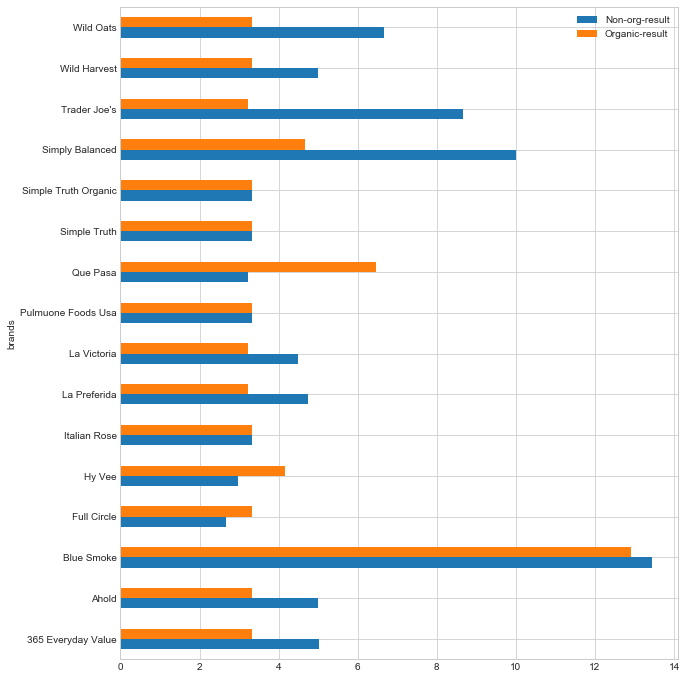

In [325]:
sns.set_style('whitegrid')
ax_salsa_sugar = df_salsa_sugar[['Non-org-result','Organic-result']]\
    .plot(kind="barh", alpha=1, label="Brands", figsize=(10,12), stacked=False)

------- Sugar level average -------
      Non-org-result  Organic-result
mean        5.325187        4.240062
------- Salt level average -------
      Non-org-result  Organic-result
mean         1.22751        1.181051


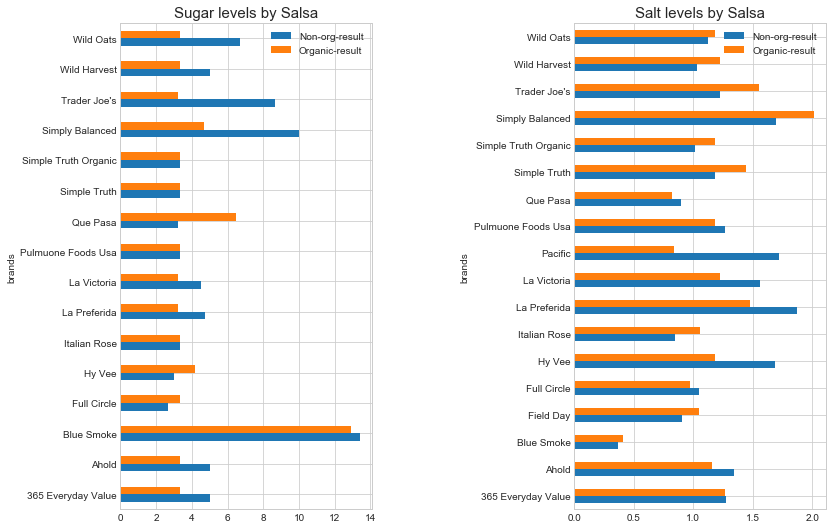

In [326]:
print('------- Sugar level average -------') 
print(df_salsa_sugar[['Non-org-result','Organic-result']].describe()[1:2])
print('------- Salt level average -------') 
print(df_salsa_salt[['Non-org-result','Organic-result']].describe()[1:2])
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,10))
fig, axes = plt.subplots(1, 2, figsize=(14,10))

df_salsa_sugar[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[0], alpha=1, label="Brands")
axes[0].set_title('Sugar levels by Salsa', size=15)

#ax_salsa_salt = fig.add_axes([1,0,1,1], aspect=1)
df_salsa_salt[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[1], alpha=1, label="Brands")
axes[1].set_title('Salt levels by Salsa', size=15)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

In [327]:
# 0 = sugar , 1 = salt
df_chips_sugar = df_extract(df_base,'chips', 0)
print(df_chip_sugar.shape)
df_chips_salt = df_extract(df_base,'chips', 1)
print(df_chip_salt.shape)

sugars_100g
(51, 6)
salt_100g
(66, 6)


------- Sugar level average -------
      Non-org-result  Organic-result
mean        19.59433       20.479325
------- Salt level average -------
      Non-org-result  Organic-result
mean        1.258161        1.085611


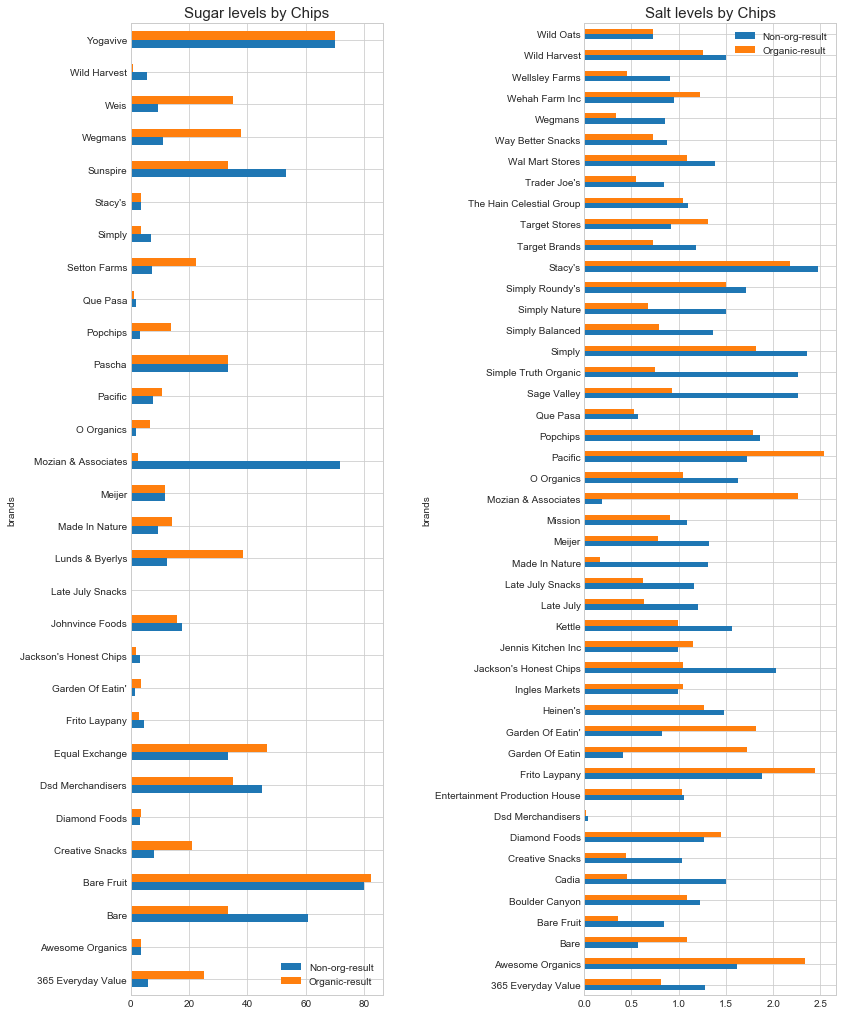

In [355]:
print('------- Sugar level average -------') 
print(df_chips_sugar[['Non-org-result','Organic-result']].describe()[1:2])
print('------- Salt level average -------') 
print(df_chips_salt[['Non-org-result','Organic-result']].describe()[1:2])
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,10))
fig, axes = plt.subplots(1, 2, figsize=(14,20))

df_chips_sugar[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[0], alpha=1, label="Brands")
axes[0].set_title('Sugar levels by Chips', size=15)

#ax_salsa_salt = fig.add_axes([1,0,1,1], aspect=1)
df_chips_salt[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[1], alpha=1, label="Brands")
axes[1].set_title('Salt levels by Chips', size=15)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

In [329]:
# checking a Brand for Stacy's
df_whole= df_base[(df_base['brands'] == "Stacy's") & (df_base['product_name'].str.contains(r'chips',flags=re.IGNORECASE))]
print(df_whole.shape)
df_whole

(5, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
20485,28400096324,Party Size Simply Naked Pita Chips,Stacy's,3.57,2.44856,0
20486,28400096515,Pita Chips,Stacy's,3.57,2.44856,0
20528,28400247245,Pita Chips,Stacy's,3.57,2.44856,0
20558,28400321495,"Pita Chips, Fire Roasted Jalapeno",Stacy's,3.57,2.54000,0
20716,28400643085,Organic Pita Chips,Stacy's,3.57,2.17678,1


In [330]:
# 0 = sugar , 1 = salt
df_juice_sugar = df_extract(df_base,'juice', 0)
print(df_juice_sugar.shape)
df_juice_salt = df_extract(df_base,'juice', 1)
print(df_juice_salt.shape)

sugars_100g
(80, 6)
salt_100g
(69, 6)


------- Sugar level average -------
      Non-org-result  Organic-result
mean        12.08939       12.041036
------- Salt level average -------
      Non-org-result  Organic-result
mean        0.099257        0.135486


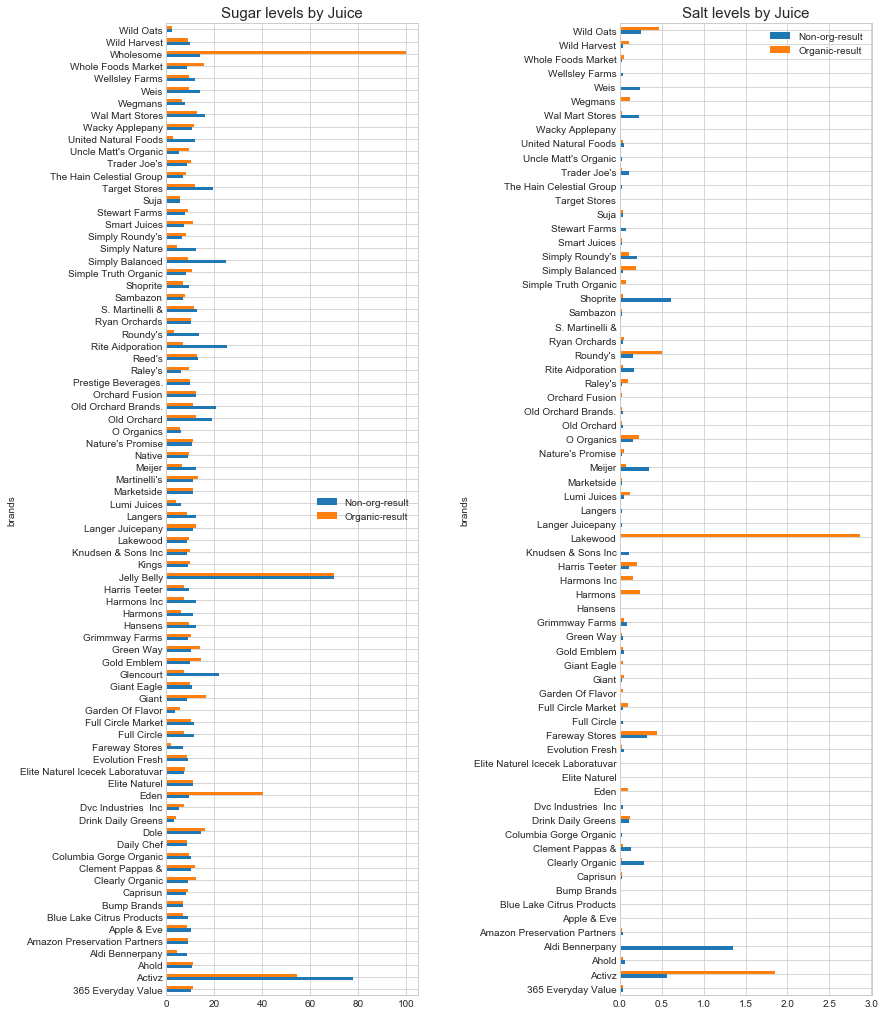

In [357]:
print('------- Sugar level average -------') 
print(df_juice_sugar[['Non-org-result','Organic-result']].describe()[1:2])
print('------- Salt level average -------') 
print(df_juice_salt[['Non-org-result','Organic-result']].describe()[1:2])
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,30))
fig, axes = plt.subplots(1, 2, figsize=(14,20))

df_juice_sugar[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[0], alpha=1, label="Brands")
axes[0].set_title('Sugar levels by Juice', size=15)

#ax_salsa_salt = fig.add_axes([1,0,1,1], aspect=1)
df_juice_salt[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[1], alpha=1, label="Brands")
axes[1].set_title('Salt levels by Juice', size=15)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

In [334]:
# 0 = sugar , 1 = salt
df_broth_sugar = df_extract(df_base,'broth', 0)
print(df_broth_sugar.shape)
df_broth_salt = df_extract(df_base,'broth', 1)
print(df_broth_salt.shape)

sugars_100g
(11, 6)
salt_100g
(18, 6)


------- Sugar level average -------
      Non-org-result  Organic-result
mean        1.371778        1.134996
------- Salt level average -------
      Non-org-result  Organic-result
mean         0.81648        0.429622


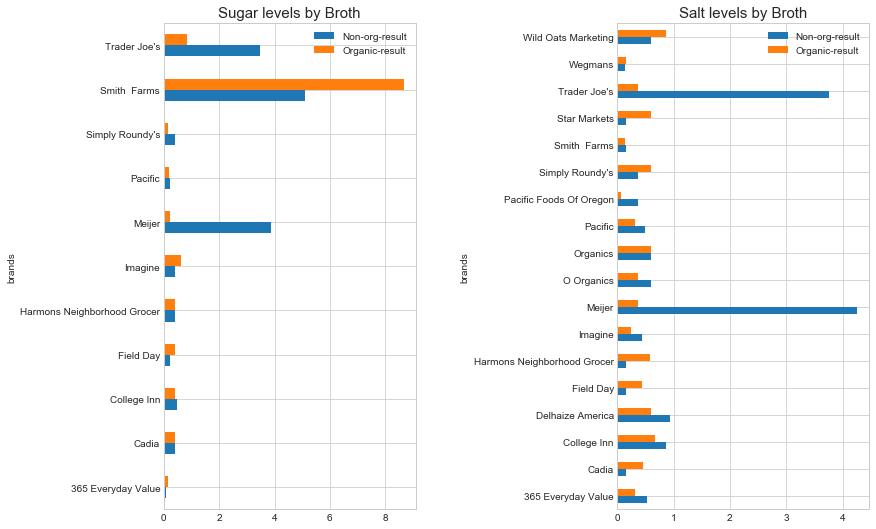

In [336]:
print('------- Sugar level average -------') 
print(df_broth_sugar[['Non-org-result','Organic-result']].describe()[1:2])
print('------- Salt level average -------') 
print(df_broth_salt[['Non-org-result','Organic-result']].describe()[1:2])
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,10))
fig, axes = plt.subplots(1, 2, figsize=(14,10))

df_broth_sugar[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[0], alpha=1, label="Brands")
axes[0].set_title('Sugar levels by Broth', size=15)

#ax_salsa_salt = fig.add_axes([1,0,1,1], aspect=1)
df_broth_salt[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[1], alpha=1, label="Brands")
axes[1].set_title('Salt levels by Broth', size=15)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

In [343]:
# checking a Brand for Smith  Farms
df_smithfarms = df_base[(df_base['brands'] == "Smith  Farms") & (df_base['product_name'].str.contains(r'broth',flags=re.IGNORECASE))]
print(df_smithfarms.shape)
df_smithfarms.head(12)


(12, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
25507,34538345210,"Smith Brothers Farms, Whole Milk",Smith Farms,5.00,0.13208,0
25508,34538435126,"Smith Brothers Farms, Lowfat Milk",Smith Farms,5.00,0.13208,0
25509,34538435218,"Smith Brothers Farms, Half & Half",Smith Farms,3.33,0.12700,0
25511,34538521348,"Smith Brothers Farms, Acidophilus Lowfat Milk",Smith Farms,5.00,0.13208,0
25513,34538524318,"Smith Brothers Farms, Cultured Lowfat Butter Milk",Smith Farms,5.00,0.27432,0
25516,34538541247,"Smith Brothers Farms, Reduced Fat Milk",Smith Farms,5.00,0.13208,0
25517,34538541261,"Smith Brothers Farms, Whole Milk",Smith Farms,5.00,0.13208,0
25518,34538541322,"Smith Brothers Farms, Half & Half",Smith Farms,3.33,0.12700,0
25519,34538835438,"Smith Brothers Farms, Tony's Coffee, Organic C...",Smith Farms,9.33,0.17780,1
25520,34538837654,"Smith Brothers Farms, Tony's Coffee, Organic C...",Smith Farms,8.33,0.10160,1


In [344]:
# 0 = sugar , 1 = salt
df_yogurt_sugar = df_extract(df_base,'yogurt', 0)
print(df_yogurt_sugar.shape)
df_yogurt_salt = df_extract(df_base,'yogurt', 1)
print(df_yogurt_salt.shape)

sugars_100g
(29, 6)
salt_100g
(28, 6)


------- Sugar level average -------
      Non-org-result  Organic-result
mean        16.65235       11.313059
------- Salt level average -------
      Non-org-result  Organic-result
mean         0.24644        0.123245


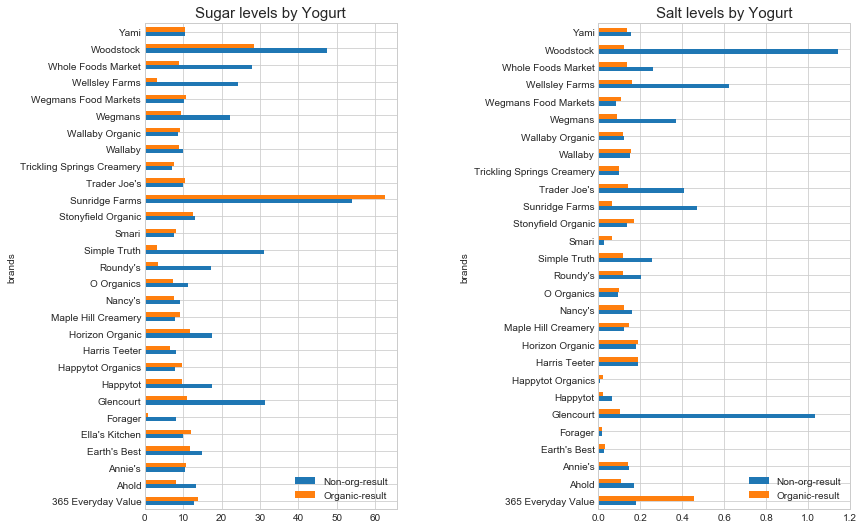

In [345]:
print('------- Sugar level average -------') 
print(df_yogurt_sugar[['Non-org-result','Organic-result']].describe()[1:2])
print('------- Salt level average -------') 
print(df_yogurt_salt[['Non-org-result','Organic-result']].describe()[1:2])
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,10))
fig, axes = plt.subplots(1, 2, figsize=(14,10))

df_yogurt_sugar[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[0], alpha=1, label="Brands")
axes[0].set_title('Sugar levels by Yogurt', size=15)

#ax_salsa_salt = fig.add_axes([1,0,1,1], aspect=1)
df_yogurt_salt[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[1], alpha=1, label="Brands")
axes[1].set_title('Salt levels by Yogurt', size=15)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

In [346]:
# checking a Brand for Horizon Organic
df_horizon = df_base[(df_base['brands'] == "Horizon Organic") & (df_base['product_name'].str.contains(r'yogurt',flags=re.IGNORECASE))]
print(df_horizon.shape)
df_horizon.head(12)

(6, 6)


,code,product_name,brands,sugars_100g,salt_100g,organic
121813,742365102431,"Tuberz, Organic Lowfat Yogurt, Blueberry Wave,...",Horizon Organic,17.54,0.17780,1
121814,742365102448,"Tubez, Lowfat Yogurt, Surfin Strawberry",Horizon Organic,17.54,0.17780,0
121815,742365132155,Organic Plain Yogurt,Horizon Organic,6.17,0.20066,1
121816,742365132209,Plain Organic Nonfat Yogurt,Horizon Organic,6.61,0.21336,1
121817,742365132254,"Organic Vanilla Yogurt, Vanilla",Horizon Organic,13.66,0.15748,1
121818,742365132308,"Organic Nonfat Yogurt, Vanilla",Horizon Organic,14.98,0.20066,1


In [347]:
df_base['product_name']

0                                                   Peanuts
1                                    Organic Salted Nut Mix
2                                            Organic Muesli
3                                             Zen Party Mix
4                                      Cinnamon Nut Granola
5                                         Organic Hazelnuts
6                                        Organic Oat Groats
7                                          Energy Power Mix
8                     Antioxidant Mix - Berries & Chocolate
9                 Organic Quinoa Coconut Granola With Mango
10                   Fire Roasted Hatch Green Chile Almonds
11                                Peanut Butter Power Chews
12                      Organic Unswt Berry Coconut Granola
13                      Roasted Salted Black Pepper Cashews
14                               Thai Curry Roasted Cashews
15                                    Wasabi Tamari Almonds
16                                      

In [348]:
# 0 = sugar , 1 = salt
df_granola_sugar = df_extract(df_base,'granola', 0)
print(df_granola_sugar.shape)
df_granola_salt = df_extract(df_base,'granola', 1)
print(df_granola_salt.shape)

sugars_100g
(27, 6)
salt_100g
(23, 6)


------- Sugar level average -------
      Non-org-result  Organic-result
mean        21.62161       20.779573
------- Salt level average -------
      Non-org-result  Organic-result
mean        0.344673        0.297132


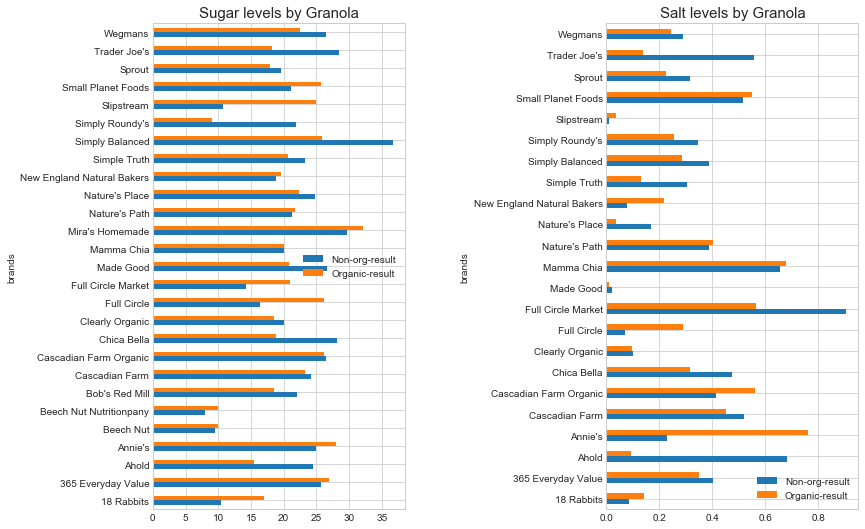

In [350]:
print('------- Sugar level average -------') 
print(df_granola_sugar[['Non-org-result','Organic-result']].describe()[1:2])
print('------- Salt level average -------') 
print(df_granola_salt[['Non-org-result','Organic-result']].describe()[1:2])
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,10))
fig, axes = plt.subplots(1, 2, figsize=(14,10))

df_granola_sugar[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[0], alpha=1, label="Brands")
axes[0].set_title('Sugar levels by Granola', size=15)

df_granola_salt[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[1], alpha=1, label="Brands")
axes[1].set_title('Salt levels by Granola', size=15)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

In [352]:
# 0 = sugar , 1 = salt
df_sauce_sugar = df_extract(df_base,'sauce', 0)
print(df_sauce_sugar.shape)
df_sauce_salt = df_extract(df_base,'sauce', 1)
print(df_sauce_salt.shape)

sugars_100g
(75, 6)
salt_100g
(67, 6)


------- Sugar level average -------
      Non-org-result  Organic-result
mean       12.345481       11.268448
------- Salt level average -------
      Non-org-result  Organic-result
mean        1.779386        1.708982


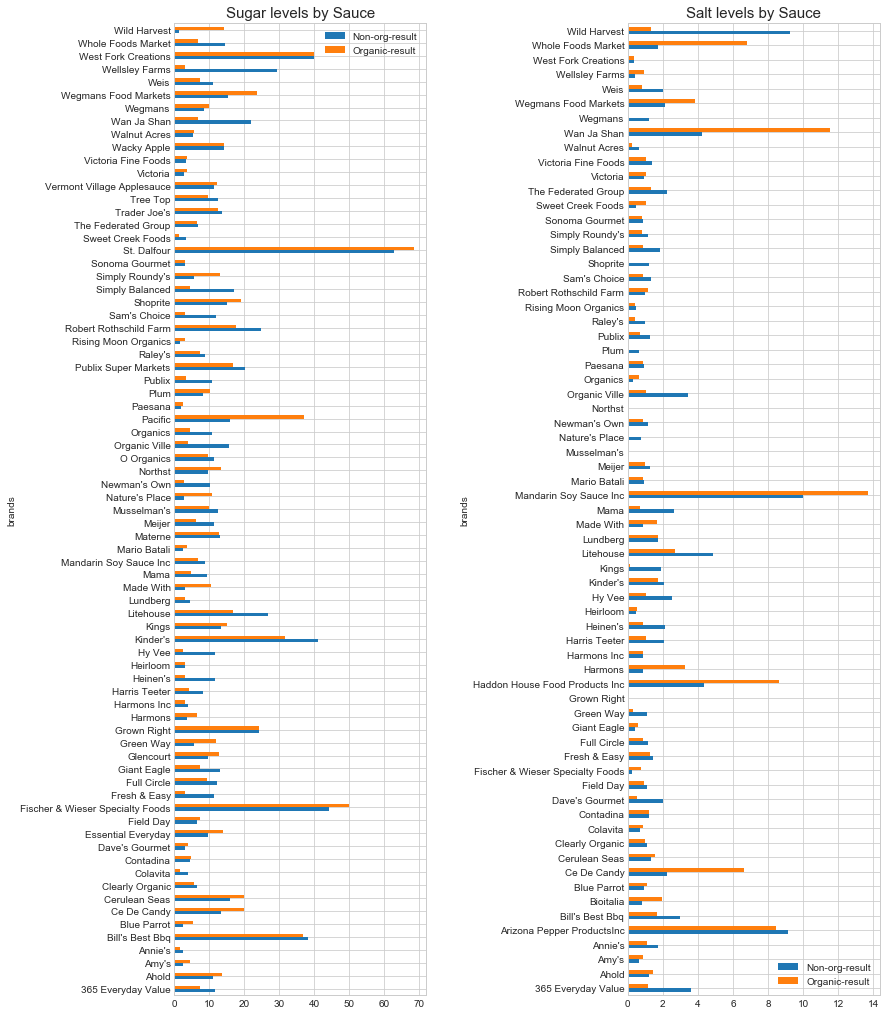

In [354]:
print('------- Sugar level average -------') 
print(df_sauce_sugar[['Non-org-result','Organic-result']].describe()[1:2])
print('------- Salt level average -------') 
print(df_sauce_salt[['Non-org-result','Organic-result']].describe()[1:2])
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,10))
fig, axes = plt.subplots(1, 2, figsize=(14,20))

df_sauce_sugar[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[0], alpha=1, label="Brands")
axes[0].set_title('Sugar levels by Sauce', size=15)

df_sauce_salt[['Non-org-result','Organic-result']].plot(kind="barh", ax=axes[1], alpha=1, label="Brands")
axes[1].set_title('Salt levels by Sauce', size=15)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

In [287]:
df_base.head(50)

,code,product_name,brands,sugars_100g,salt_100g,organic
0,4559,Peanuts,Torn & Glasser,17.86,0.63500,0
1,16087,Organic Salted Nut Mix,Grizzlies,3.57,1.22428,1
2,16124,Organic Muesli,Daddy's Muesli,15.62,0.13970,1
3,16872,Zen Party Mix,Sunridge,3.33,1.60782,0
4,18012,Cinnamon Nut Granola,Grizzlies,21.82,0.02286,0
5,18050,Organic Hazelnuts,Grizzlies,3.57,0.01016,1
6,18227,Organic Oat Groats,Pcc,2.38,0.02540,1
7,18265,Energy Power Mix,Sunridge,32.50,0.28448,0
8,18289,Antioxidant Mix - Berries & Chocolate,Sunridge,30.00,0.46482,0
9,18319,Organic Quinoa Coconut Granola With Mango,Sunridge,27.27,0.02286,1


In [274]:
df_salsa_sugar[['Non-org-result','Organic-result']].mean(axis=0) 

Non-org-result    5.325187
Organic-result    4.240062
dtype: float64

In [275]:
df_salsa_sugar.head()

,Non-org-cnt,Organic-cnt,Non-org-sum,Organic-sum,Non-org-result,Organic-result
brands,,,,,,
365 Everyday Value,17,2,85.44,6.66,5.025882,3.330
Ahold,7,3,34.95,9.99,4.992857,3.330
Blue Smoke,6,1,80.63,12.90,13.438333,12.900
Full Circle,5,2,13.33,6.66,2.666000,3.330
Hy Vee,7,4,20.83,16.66,2.975714,4.165
